In [1]:
from anotherJEPA3 import TrajectoryDataset
import random
import torch
import PIL
import matplotlib.pyplot as plt

In [2]:
dataset = TrajectoryDataset('../data/states.npy', '../data/actions.npy')

25 58
28 30
25 58


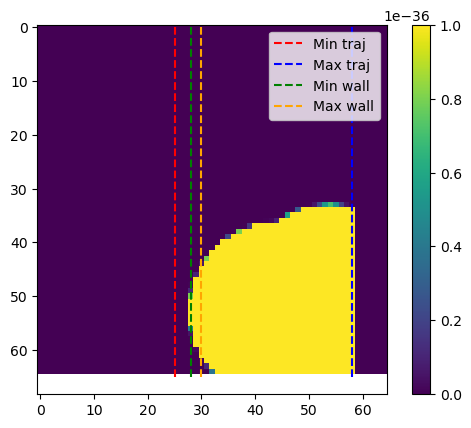

Random number between the range: -19


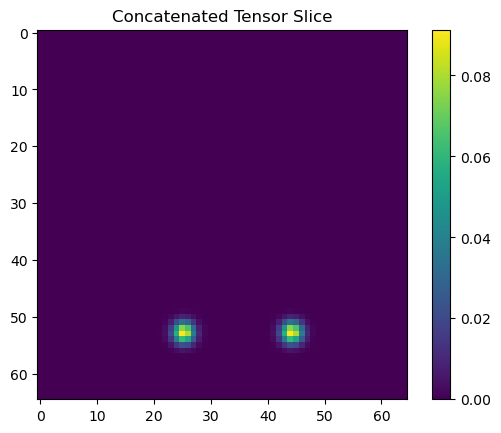

tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]])


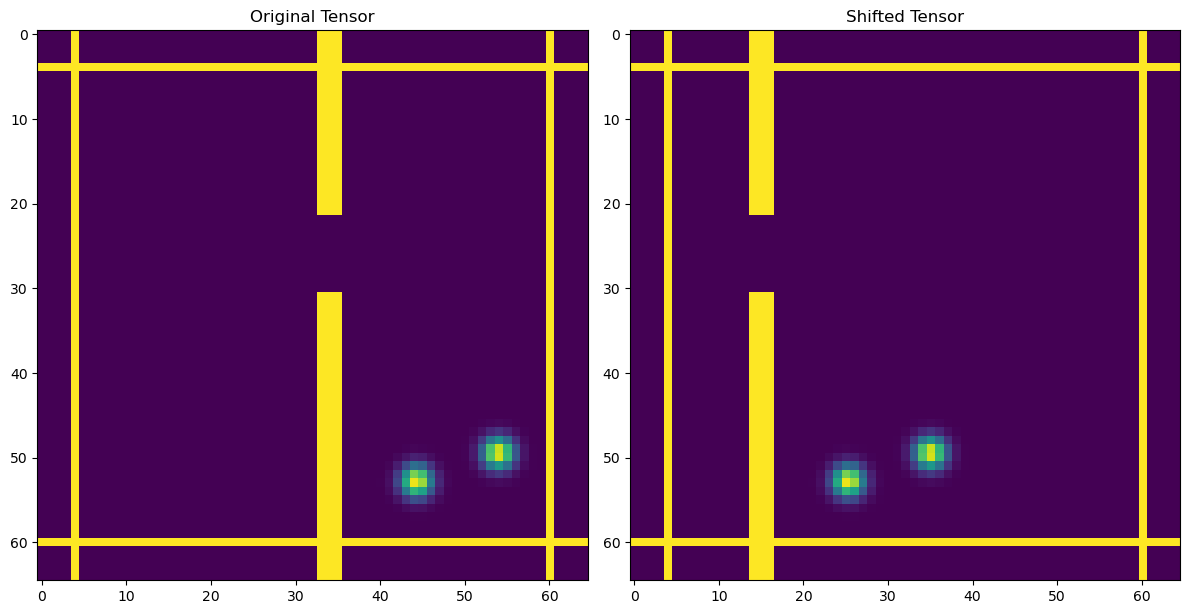

In [31]:
states, actions = dataset[8]  # This will print "augmenting"
start = states[0][0]  # Example indexing to get the tensor
end = states[-1][0]
walls = states[0][1]
capped_tensor = torch.clamp(start+end, max=1E-36)


_, _, width_non_zeros = torch.nonzero((states[:, 0] != 0), as_tuple=True)
width_min = width_non_zeros.min().item()
width_max = width_non_zeros.max().item()

wall_non_zeros = torch.nonzero(states[-1, 1, 0, 5:-5] != 0)
wall_min = wall_non_zeros.min().item()
wall_max = wall_non_zeros.max().item()

global_min_all = min(width_min, width_max, wall_min, wall_max)
global_max_all = max(width_min, width_max, wall_min, wall_max)

print(width_min, width_max)
print(wall_min, wall_max)
print(global_min_all, global_max_all)

plt.imshow(capped_tensor.numpy(), cmap="viridis")
plt.colorbar()  # Optional: To display the color scale

# Plot vertical lines at min and max width indices
plt.vlines(width_min, ymin=0, ymax=capped_tensor.shape[1], colors='red', linestyle='--', label="Min traj")
plt.vlines(width_max, ymin=0, ymax=capped_tensor.shape[1], colors='blue', linestyle='--', label="Max traj")

plt.vlines(wall_min, ymin=0, ymax=capped_tensor.shape[1], colors='green', linestyle='--', label="Min wall")
plt.vlines(wall_max, ymin=0, ymax=capped_tensor.shape[1], colors='orange', linestyle='--', label="Max wall")

# Optional: Add a legend for the lines
plt.legend()

# Show the plot
plt.show()

min_shift = 5 - global_min_all
max_shift = 59 - global_max_all
shift = torch.randint(min_shift, max_shift + 1, size=(1,))  # +1 because max is exclusive

print("Random number between the range:", shift.item())

left_edge = states[:, :, :, 0:5]
core = states[:, :, :, 5:-5]  # First part (before the shift)
right_edge = states[:, :, :, -5:]

wall_slice1 = core[:, :, :, 0:-shift]  # First part (before the shift)
wall_slice2 = core[:, :, :, -shift:]   # Second part (after the shift)

shifted_walls = torch.cat((left_edge, wall_slice2, wall_slice1, right_edge), dim=3)

slice1 = states[:, :, :, 0:-shift]  # First part (before the shift)
slice2 = states[:, :, :, -shift:]   # Second part (after the shift)

shifted = torch.cat((slice2, slice1), dim=3)


shifted.shape

shifted_start = shifted[0][0]  # Example indexing to get the tensor
shifted_end = shifted[-1][0]
shifted_capped = torch.clamp(start+end, max=1E-1)
# shifted_walls = shifted[0][1]

# Plot the concatenated tensor (show the first frame as an example)
plt.imshow(start+shifted_start, cmap="viridis")  # Assuming you want to plot the first image
plt.colorbar()  # Optional: To display the color scale
plt.title("Concatenated Tensor Slice")
plt.show()

fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot original (non-shifted) image
axes[0].imshow(start + end + walls, cmap="viridis")
axes[0].set_title("Original Tensor")

# Plot shifted image
print(shifted_walls[0])
axes[1].imshow(shifted_start + shifted_end + shifted_walls[0][1], cmap="viridis")
axes[1].set_title("Shifted Tensor")

plt.tight_layout()
plt.show()

In [26]:
shifted_walls[0]

tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])